# Renewable Energy Sources - APP CSP
<i><u>Author</u> : Anthony CHUNG (25881800) - Louis GOUDERS  - Augustin LAMBOTTE - Amaury LARIDON</i>

<u>Main Reference</u> : *Advanced CSP Teaching Material - Chapter 5 Parabolic Trough Technology*



---

## Context 
An agro-food industry established in the South of Spain, near Granada, would like to produce its own energy, in order to meet both its electricity and heat needs.

Hired as an energy efficiency engineer, we are asked to investigate the possibility of building a CSP plant, that should be designed to avoid injecting electricity on the grid to maximize the ROI. 

Additionally, we are also asked to think  about management of the production during the night so that the factory does not stop running, but still runs at a capacity factor of minimum 30% of the design baseload.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data

The city of Granada is located in Spain with the latitude 37.17 and the longitude -3.58.  
The data for the year 2019 is provided by the The National Solar Radiation Database (NSRDB). The granularity of the dataset is set to 30 minutes and here's below a list of the informations given : 

Meteorological data:
- Half-hourly irradiance DHI [W/m2]
- Half-hourly irradiance DNI [W/m2]
- Half-hourly irradiance GHI [W/m2]
- Drew point [°C]
- Temperature (dry bulb) [Celsius]
- Pressure [mbar]
- Relative Humidity [%]
- Wind direction [deg]
- Wind speed [m/s]


In [38]:
#CSV files
df_granada = pd.read_csv('Granada_msg-iodc_30_2019.csv',header = 2, usecols =  [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
df_granada.head()

#Extract the period of interest
# Index of first day of August
idx_start = df_granada.index[df_granada['Month'] == 8][0]
# Index of first day of October
idx_last = df_granada.index[df_granada['Month'] == 10][-1]
df2_granada = df_granada[idx_start:idx_last+1]
df2_granada.tail()

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Surface Albedo,Clearsky DHI,Clearsky DNI,Clearsky GHI
14587,2019,10,31,21,30,0,0,0,13.0,17.6,960,74.36,331,1.9,0.16,0,0,0
14588,2019,10,31,22,0,0,0,0,13.0,17.4,960,75.58,331,1.9,0.16,0,0,0
14589,2019,10,31,22,30,0,0,0,13.0,17.1,960,77.02,331,1.8,0.16,0,0,0
14590,2019,10,31,23,0,0,0,0,13.2,16.8,960,79.12,332,1.8,0.16,0,0,0
14591,2019,10,31,23,30,0,0,0,13.2,16.6,960,80.13,333,1.8,0.16,0,0,0


Text(0.5, 0, 'time [half hours]')

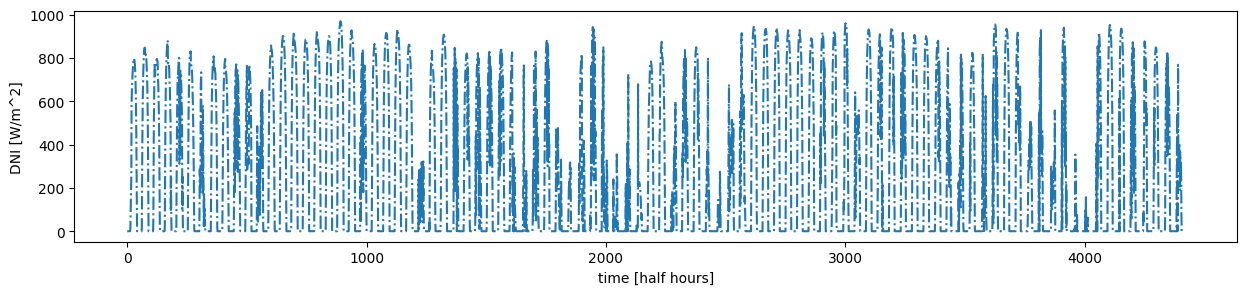

In [39]:
time = np.arange(len(df2_granada))
DNI = df2_granada['DNI']      
# DHI = df2_granada['DHI']    
# GHI = df2_granada['GHI']     


plt.figure(figsize = (15,3))
plt.plot(time, DNI,'-.')
plt.ylabel('DNI [W/m^2]')
plt.xlabel('time [half hours]')

# plt.figure(figsize = (15,3))
# plt.plot(time, DHI,'-.')
# plt.ylabel('DHI [W/m^2]')
# plt.xlabel('time [half hours]')500

# plt.figure(figsize = (15,3))
# plt.plot(time, GHI,'-.')
# plt.ylabel('GHI [W/m^2]')
# plt.xlabel('time [half hours]')
# plt.show()

# First Cycle 

In order to find the size of the solar field and the storage facility, it is needed to compute the caracteristics of the thermo-cycle that produce electricity with the turbine.
This cycle is composed by :
- Pump with isothermal compression
- 2 Heaters isobare
- Turbine with isentropic relaxing
- Condenser isobare

We have thus 5 states and the giving variables :
- The T2 temperature is set at $T_2 = 65\space°C$
- The intermediate temperature between the 2 heaters is $T_3 = 90\space°C$
- The steam temperature after the second heater is $T_4 = 133\space°C$
- The pressure during the heating process is set at $p_4 = 3\space[bar]$
- The heat exchange is $P_1 = 270$ and $P_2 = 220\space[kWh_{th}/t_{sugar}]$
- The electricity produce at the turbine is $P_3 = 90\space[kWh_{e}/t_{sugar}]$
- The facility process $14000 \space [t]$ of beets during a day at nominal production
- It is needed $6.5\space[kg]$ of beets to produce $1\space[kg]$ of sugar
- The efficiency of the heater are $1 \space [/]$
- the efficiency of the Turbine is $0.98 \space [/]$

## Water Flow rate

To compute the water flow rate, we need to know the heat exchanged during day :

In [40]:
y=12
Qdotdot_1 = 270 #[kWh_th/t_s]
Qdotdot_2 = 220 #[kWh_th/t_s]
masse = 14*10**3/6.5 #[t_s/jour]
masse_jour = masse/24  #[t_s/h]

Qdot1_day = Qdotdot_1*masse_jour 
Qdot2_day = Qdotdot_2*masse_jour 

print("""Thermal power in the two heaters :
          Evaporator = {0:.2f} [kW]
          Purificator = {1:.2f} [kW] \n""".format(Qdot1_day, Qdot2_day))

Thermal power in the two heaters :
          Evaporator = 24230.77 [kW]
          Purificator = 19743.59 [kW] 



With these values, we can compute the flow rate of the water in the two heaters :

In [41]:
cp_eau = 4.180 #[kJ/(kg*K)]
T4 = 133+273.15 #[K]
T3 = 90+273.15  #[K]
T2 = 65+273.15  #[K]
mdot_eau_1_day = (Qdot1_day)/(cp_eau*(T4-T3))
mdot_eau_2_day = (Qdot2_day)/(cp_eau*(T3-T2))
print("""Flow rate of the water in the system :
          Evaporator = {0:.2f} [kg/s]
          Purificator = {1:.2f} [kg/s] \n""".format(mdot_eau_1_day, mdot_eau_2_day))

Flow rate of the water in the system :
          Evaporator = 134.81 [kg/s]
          Purificator = 188.93 [kg/s] 



We observe that the flow rates are different for the two heaters. Since we cannot modify the heat and the temperatures of the water, we will introduce a floodgate between them.

# Second cycle
## Heat exchanger between the First and the second cycle
For this part of the CSP, with all the data calculated in the previous section we can compute the flow rate of the Therminol VP1. For this, we need to impose some variables :
- Hot temperature of therminol = 400 °C
- Cold temperature of therminol close to 300 °C because the CSP is more efficient with a difference of temperature of $100\space°C$
- Type of fluid : Therminol VP1

## Flow rate
Knowing the heat released by the therminol, we can compute the flow rate in the first heat exchanger and then impose it in the second one and adapt the temperature. This will prevent us to set an floodgate between the two exchangers like for the first cycle.

In [42]:
cp_t = 2.630 #[kJ/(kg*K)]
Tx3 = 400 #[°C]
def Flow_rate(Qdot1, Qdot2):
    Tx1 = 349
    Tx2 = 350
    mdot_VP_1 = (Qdot1)/(cp_t*(Tx3-Tx2))
    while Tx1 >= 300:
        Tx2 -= 0.01
        mdot_VP_1 = (Qdot1)/(cp_t*(Tx3-Tx2))
        Tx1 = Tx2 - Qdot2/(cp_t*mdot_VP_1)
    return (mdot_VP_1, Tx1)
c,d = Flow_rate(Qdot1_day, Qdot2_day)
a,b = Flow_rate(Qdot1_night, Qdot2_night)
print("""Flow rate of the Therminol VP1 = {0:.2f} [kg/s] 
Final temperature = {1:.2f} [°C]   \n""".format(c,d))

NameError: name 'Qdot1_night' is not defined

The flow rate heated by the solar field is the sum of the flow rate in the heater between the two cycles and the heater between the second cycle and the storage system.

## Storage facility capacity
The storage facility need to provide the enough heat so the facility can still produce $90\space[kWh_{e}/t_{sugar}]$ during the night when there is no sun to heat the Therminol VP1 with the solar field. Knowing that during night, the manufacture process $30\%$ of the nominal quantity of beets.

Since the quantity of sugar produce during night is not the same than during the day at nominal production. The heat needed to raise the water temperature change changing then all the other parameters.

In [44]:
masse_nuit = 30/100 * masse_jour #[t_s/h]
Qdot1_night = Qdotdot_1*masse_nuit
Qdot2_night = Qdotdot_2*masse_nuit
mdot_eau_1_night = (Qdot1_night)/(cp_eau*(T4-T3))
mdot_eau_2_night = (Qdot2_night)/(cp_eau*(T3-T2))
a,b = Flow_rate(Qdot1_night, Qdot2_night)

print("""Thermic power at the exchanger :
          Evaporator : {0:.2f} [kW]
          Purificator : {1:.2f} [kW] \n
Flow of water in the first cycle :
          Evaporator : {2:.2f} [kg/s]
          Purificator : {3:.2f} [kg/s] \n
Flow of Therminol VP1 : {4:.2f} [kg/s] 
          Cold temperature : {5:.2f} [°C]   \n""".format(Qdot1_night,Qdot2_night,mdot_eau_1_night,mdot_eau_2_night,a,b))

Thermic power at the exchanger :
          Evaporator : 7269.23 [kW]
          Purificator : 5923.08 [kW] 

Flow of water in the first cycle :
          Evaporator : 40.44 [kg/s]
          Purificator : 56.68 [kg/s] 

Flow of Therminol VP1 : 50.15 [kg/s] 
          Cold temperature : 299.99 [°C]   



By knowing the flow and the temperature of the Therminol, we can dimension the liquid salt tank storage by using these data for the liquid salt :
- $\rho = 2519.16 [kg/m^{3}]$
- $c_p = 1.53 \space [kJ/(kg*K)]$
- The upper limit for the salt temperature is $365 \space °C$
- The down limit of the temperature is $250 \space °C$

In [45]:
density_salt = 2519.16 #[kg/m3]
delta_T_salt = 365-250
cp_salt = 1.53

mdot_salt = cp_t*a*(Tx3-Tx1)/(0.98*cp_salt*delta_T_salt)

V_tank = mdot_salt * (24-y) * 3600 / density_salt

print("""Liquid salt flow rate = {0:.2f} [kg/s]
Volume du réservoir = {1:.2f} [m^3]""".format(mdot_salt,V_tank))

NameError: name 'Tx1' is not defined

We obtain a total volume for the tank of $1333.19 \space [m^{3}]$ to ensure that the company can still run during night. 

## Storage Facility charging
Now that we know the full size of the storage, we can determine the flow of the field HTF fluid in the storage heat exchanger cycle. 

In [ ]:
Flow_salt_day = V_tank * density_salt /(y*3600)
Qdot_day_storage = Flow_salt_day * cp_salt * delta_T_salt
flow_VP1 = Qdot_day_storage / (cp_t*(Tx3-Tx1))
print("""Flow rate of Therminol VP1 in Storage heat exchanger during day = {0:.2f} [kg/s]""".format(flow_VP1))

Flow of Thermino VP1 in Storage heat exchanger during day = 50.36 [kg/s]


# Solar field design

In order to compute the size of the solar field, we will need to compute the aperture area as well as defining a distance between the collector rows.
It has been showned that the formula for the rough approximation of the aperture area given below is a good representation of existang power plants.

\begin{aligned}
    A_{ap} = \frac{P_{el} \cdot SM}{\eta \cdot G_{b,ap}}
\end{aligned}
where 
- $P_{el}$ is the rated electric power 
- $SM$ is the solar multiple 
- $\eta$ is the solar-to-electric efficiency
- $G_{b,ap}$ is the direct irradiance at the design point on the collector aperture



In [46]:
def aperture_area(P_el,SM, eta, design_point):
    A = (P_el*10**6*SM)/(eta*design_point)
    return A

### Design without storage

**Rated electric power**

Givent that we processes $14 000$ tons of sugar-beets per day and 1 kg of sugar requires 6.5 kg of beets, our facility produces $2153.84$ tons of sugar per day at nominal load.

Since the installation needs $90\ kWh_e/t_{sugar}$ in order to produce, we need a capacity of $(90 \cdot 2153,84) = 193\,845,6 \; kWh.day^{-1}$ or $\frac{90 \cdot 2153,84}{24} = 8.08\ MW$. Thus, $P_{el} =  8.08\ MW$

<!-- This value falls between the usual range of capacity for CSP of $30$ to $80\ MW$ -->

In [1]:
prod = 14000/6.5
P_el_1 = 90 * prod/24/1000
print(P_el_1)

8.076923076923077


**Solar Multiple**

The solar multiple being the ratio of the thermal power of the solar field at design point to the required thermal power for the full-load operated power block. Let's first consider the solar field without storage, thus $SM=1$

In [48]:
SM_1 = 1


**Solar-to-electric efficiency**

In [49]:
eta_1 = 0.14 # data given by the textbook ? 



*Optical losses*

#TODO

À regarder dans les slides et notebook 

*Thermal losses*

À regarder dans les slides et notebook 

Au final on fait un $\eta$ comme produit des différentes pertes trouvées au dessus. 

**Direct irradiance**

In order to dimension the aperture area, we need to define a rederence irradiance value to be a design point. Several choices can be considered such as the peak irradiance or a weak irradiance, but both choices have their pros and cons
- If we choose a high direct irradiance, then the power block is nearly always operated under part-load conditions, which reduces the power block efficiency
- If we choose a low direct irradiance, then the solar field gets very large, which raises the investment costs and it will happen more frequently that thermal energy from the solar field cannot be used in the power block and has to be dumped

A better solution can be found as follow, according to the textbook : *"Simulations concerning a specific 50MW plant in southern Spain rendered the result that the optimal design direct collector irradiance corresponds to the value that has a frequency distribution of 55-60%, which for the considered location was at 650-700W/m². The frequency distribution means that at 55-60% of the periods, when direct radiation is available, the direct radiation on the collector aperture reaches this value or is higher."*

Since our installation will also be located in the South of Spain and the we have a quite similar capacity, we will compute the direct irradiance that has a frequency distribution of 55-60% for our database.


In [62]:
DNI_range = np.arange(50, 1050, 50)
DNI_lenna = np.count_nonzero(DNI)
lb_DNI = 0
UB_DNI = 0
DNI_count = dict.fromkeys(DNI_range, 0)
for i in DNI : 
    for j in DNI_range :
        if i>= j:
            DNI_count[j] += 1
        
for (i,j) in DNI_count.items():
    DNI_count[i] = j/DNI_lenna*100
    if DNI_count[i] > 54.5 and DNI_count[i] < 55.5:
        ub_DNI = i
    if DNI_count[i] < 61.5 and DNI_count[i] > 59.5:
        lb_DNI = i

print("Frequency distribution of direct irradiance : ")
for (i,j) in DNI_count.items():
    print("    ",i, "W/m² :", round(j,1) ,"%")

print("Optimal direct irradiance for design point : [", lb_DNI,",", ub_DNI,"]" , "W/m²")

DNI_design_1 = (ub_DNI + lb_DNI)/2 

print("Direct Normal Irradiance value choosen : {:.2f} W/m²".format(DNI_design_1))

Frequency distribution of direct irradiance : 
     50 W/m² : 95.2 %
     100 W/m² : 91.4 %
     150 W/m² : 88.1 %
     200 W/m² : 84.3 %
     250 W/m² : 79.1 %
     300 W/m² : 73.9 %
     350 W/m² : 69.4 %
     400 W/m² : 65.3 %
     450 W/m² : 61.2 %
     500 W/m² : 57.9 %
     550 W/m² : 54.9 %
     600 W/m² : 51.1 %
     650 W/m² : 47.8 %
     700 W/m² : 43.0 %
     750 W/m² : 36.2 %
     800 W/m² : 27.1 %
     850 W/m² : 17.6 %
     900 W/m² : 7.8 %
     950 W/m² : 0.8 %
     1000 W/m² : 0.0 %
Optimal direct irradiance for design point : [ 450 , 550 ] W/m²
Direct Normal Irradiance value choosen : 500.00 W/m²


From the calculation, we observe that the optimal direct irradiance falling the in frequency distribution of 55-60% is around $[450,550]\ W/m²$, which is again close the the texbook simulations. 
We decide to choose the average value as design point.

Thus, we can compute the approximation of the aperture area with the values: 

- $P_{el} = 8.08\ MW$
- $SM = 1$ 
- $\eta = 0.14$ 
- $G_{b,ap} = 500\ W/m²$

In [51]:
A_without_storage = aperture_area(P_el_1, SM_1, eta_1, DNI_design_1)

print("Aperture Area :",round(A_without_storage,2),"m² =",A_without_storage/(10**6),"km²")

Aperture Area : 115384.62 m² = 0.11538461538461539 km²


In order to have an order of magnitude for the representation of this value it represent a square with a side length of $\approx 339\;m$.

From here, we can make some assumptions based on the textbook to estimate the size of the ground area. Indeed, since the solar fied is composed of rows of collectors loops with a certain arrangment the factory, we need to take into account the distance between the collector loops as well as the size of the collector itself.

As collector's type we use the *SkyFuel SkyTrough (with 80-mm OD receiver)* already implemented in the SAM software. 
It has the following proporties,

- Aperture width = 6m 
- Lenghth of collector assembly (for up branch of the loop)  = 115m 
- Number of module per assembly = 8 

They are other parameters that we have to (re)define ourself,

- Spacing between each collector = 0.4m 
- Pipping distance between assembly = 12m

In [52]:
def ground_area(aperture_area):
    nb_collectors = aperture_area/6/12
    nb_collectors_loop = nb_collectors/12
    ground_area = aperture_area + (nb_collectors_loop*2*12*12)
    return ground_area,nb_collectors,nb_collectors_loop

In [57]:
ground_area_1,nb_collectors_1,nb_collectors_loop_1 = ground_area(A_without_storage)
print("Ground area :",round(ground_area_1,2),"m² =",round(ground_area_1/(10**6),2),"km²")
print("Number of collectors :", round(nb_collectors_1))
print("Number of collectors per loop :", round(nb_collectors_loop_1))
print("Represent a square with a side length of {:.2f} m".format(np.sqrt(ground_area_1)))

Ground area : 153846.15 m² = 0.15 km²
Number of collectors : 1603
Number of collectors per loop : 134
Represent a square with a side length of 392.23 m


### Design with storage

In order to consider a storage of energy to continue the production during the night we have to consider a different solar multiple $SM$. Since we want to store energy so that the facility can continue to produce at 30% of nominal load capacity during the night we define a Solar Multiple as follow,

In [58]:
SM_storage = 1.3

The rest of the parameters for the aparture area can be kept constant so that we have,

- $P_{el} = 8.08\ MW$
- $SM = 1.3$ 
- $\eta = 0.14$ 
- $G_{b,ap} = 500\ W/m²$

We then compute the new value of the Aperture Area given those parameters values,

In [59]:
A_with_storage = aperture_area(P_el_1, SM_storage, eta_1, DNI_design_1)

print("Aperture Area :",round(A_with_storage,2),"m² =",A_with_storage/(10**6),"km²")

Aperture Area : 150000.0 m² = 0.15 km²


Now we compute the ground area needed to fullfil this aperture area with storage energy,

In [60]:
ground_area_2,nb_collectors_2,nb_collectors_loop_2 = ground_area(A_with_storage)
print("Ground area :",round(ground_area_2,2),"m² =",round(ground_area_2/(10**6),2),"km²")
print("Number of collectors :", round(nb_collectors_2))
print("Number of collectors per loop :", round(nb_collectors_loop_2))
print("Represent a square with a side length of {:.2f} m".format(np.sqrt(ground_area_2)))

Ground area : 200000.0 m² = 0.2 km²
Number of collectors : 2083
Number of collectors per loop : 174
Represent a square with a side length of 447.21 m
